In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GPRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import requests

In [3]:
user_res = requests.get("http://ec2-3-34-96-177.ap-northeast-2.compute.amazonaws.com:3000/user").text
df_user = pd.read_json(user_res)
df_user

,userid,pw,username,height,weight,sex,image
0,dbehdgns118,123456,유동훈,180,55.0,0,
1,feelwjd,123456,민정필,172,70.0,0,
2,jasonoh22,123456,오제민,175,70.0,0,
3,testgirl,123456,testgirl,155,43.6,1,
4,testgirl2,123456,girl2,150,50.0,1,


In [4]:
workout_res = requests.get("http://ec2-3-34-96-177.ap-northeast-2.compute.amazonaws.com:3000/workout").text
df_workout = pd.read_json(workout_res)
df_workout

,workoutid,part,workoutname,class
0,1,유산소,싸이클,1
1,2,유산소,엘립티컬 머신,1
2,3,유산소,트레드밀 러닝,1
3,4,유산소,러닝,0
4,5,유산소,버피,0
...,...,...,...,...
294,295,전완근,리스트 컬 (덤벨),0
295,296,전완근,리스트 컬 (바벨),1
296,297,전완근,리스트 롤러,1
297,298,전완근,리버스 리스트 컬 (바벨),1


In [5]:
routine_res = requests.get("http://ec2-3-34-96-177.ap-northeast-2.compute.amazonaws.com:3000/routine").text
df_routine = pd.read_json(routine_res)
df_routine

,routineid,routinename,description
0,1,feelwjd's routine,description
1,2,dbehdgns118,2
2,3,jasonoh22,3
3,4,testgirl,4


In [6]:
user_routine_res = requests.get("http://ec2-3-34-96-177.ap-northeast-2.compute.amazonaws.com:3000/user-routine").text
df_user_routine = pd.read_json(user_routine_res)
df_user_routine

,UserRoutineId,userid,routineid,RoutineDate,Time
0,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03
1,2,dbehdgns118,2,2021-09-21T00:00:00.000Z,21:59:00
2,3,jasonoh22,3,2021-09-21T00:00:00.000Z,21:59:00
3,4,testgirl,4,2021-09-21T00:00:00.000Z,21:59:00


In [7]:
routine_workout_res = requests.get("http://ec2-3-34-96-177.ap-northeast-2.compute.amazonaws.com:3000/routine-workout").text
df_routine_workout = pd.read_json(routine_workout_res)
df_routine_workout

,RoutineWorkoutId,routineid,workoutid
0,1,1,172
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5
...,...,...,...
294,295,2,295
295,296,2,296
296,297,2,297
297,298,2,298


In [8]:
user_routine_workout_res = requests.get("http://ec2-3-34-96-177.ap-northeast-2.compute.amazonaws.com:3000/user-routine-workout").text
df_user_routine_workout = pd.read_json(user_routine_workout_res)
df_user_routine_workout

,UserRoutineWorkoutId,UserRoutineId,WorkoutId
0,1,1,172
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5
...,...,...,...
294,295,2,295
295,296,2,296
296,297,2,297
297,298,2,298


In [9]:
df_user_group = df_user_routine_workout.groupby(['UserRoutineId'])
user1 = df_user_group.get_group(1)
user1

,UserRoutineWorkoutId,UserRoutineId,WorkoutId
0,1,1,172
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5
...,...,...,...
198,199,1,199
199,200,1,200
200,201,1,201
201,202,1,202


In [10]:
user_recommend_dataset = df_user_routine_workout.copy()
user_recommend_dataset

,UserRoutineWorkoutId,UserRoutineId,WorkoutId
0,1,1,172
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5
...,...,...,...
294,295,2,295
295,296,2,296
296,297,2,297
297,298,2,298


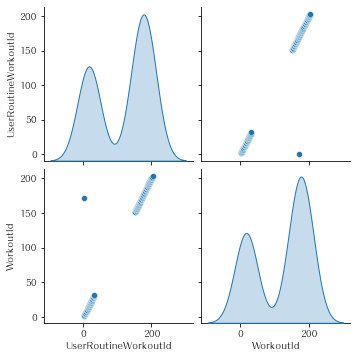

In [11]:
sns.pairplot(user1[["UserRoutineWorkoutId","WorkoutId"]], diag_kind="kde")

In [12]:
df_workout

,workoutid,part,workoutname,class
0,1,유산소,싸이클,1
1,2,유산소,엘립티컬 머신,1
2,3,유산소,트레드밀 러닝,1
3,4,유산소,러닝,0
4,5,유산소,버피,0
...,...,...,...,...
294,295,전완근,리스트 컬 (덤벨),0
295,296,전완근,리스트 컬 (바벨),1
296,297,전완근,리스트 롤러,1
297,298,전완근,리버스 리스트 컬 (바벨),1


## 클래스 ( 기구필요여부)에 따른 총 운동량 분석

In [13]:
workout_class = df_workout.groupby(['class'])
workout_class

In [14]:
equipment_workout = workout_class.get_group(1)
non_equipment_work = workout_class.get_group(0)

In [15]:
equipment_workout

,workoutid,part,workoutname,class
0,1,유산소,싸이클,1
1,2,유산소,엘립티컬 머신,1
2,3,유산소,트레드밀 러닝,1
7,8,유산소,로잉 머신,1
8,9,유산소,스텝 머신,1
...,...,...,...,...
291,292,이두,리버스 컬 (이지바),1
292,293,이두,프리쳐 컬 (케이블),1
295,296,전완근,리스트 컬 (바벨),1
296,297,전완근,리스트 롤러,1


In [35]:
e_workout_part = equipment_workout.groupby('part')
e_workout_part.count()

,workoutid,workoutname,class
part,,,
가슴,18,18,18
등,26,26,26
삼두,9,9,9
어깨,19,19,19
유산소,7,7,7
이두,12,12,12
전완근,3,3,3
코어,5,5,5
하체,31,31,31


<BarContainer object of 9 artists>

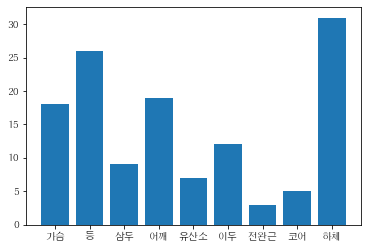

In [37]:
plt.bar(e_workout_part.count().index, e_workout_part.count().workoutid)

<BarContainer object of 9 artists>

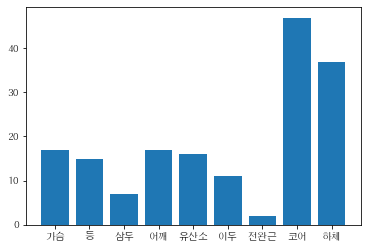

In [38]:
n_workout_part = non_equipment_work.groupby('part')
plt.bar(n_workout_part.count().index, n_workout_part.count().workoutid)

## 사용자별 클래스별 운동량 분석

In [40]:
merge_user = pd.merge(df_user_routine, df_user_routine_workout, how ='outer', on = 'UserRoutineId')
merge_user

,UserRoutineId,userid,routineid,RoutineDate,Time,UserRoutineWorkoutId,WorkoutId
0,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,1,172
1,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,2,2
2,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,3,3
3,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,4,4
4,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,5,5
...,...,...,...,...,...,...,...
294,4,testgirl,4,2021-09-21T00:00:00.000Z,21:59:00,248,248
295,4,testgirl,4,2021-09-21T00:00:00.000Z,21:59:00,249,249
296,4,testgirl,4,2021-09-21T00:00:00.000Z,21:59:00,250,250
297,4,testgirl,4,2021-09-21T00:00:00.000Z,21:59:00,251,251


In [41]:
merge_user.groupby('userid').get_group("feelwjd")

,UserRoutineId,userid,routineid,RoutineDate,Time,UserRoutineWorkoutId,WorkoutId
0,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,1,172
1,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,2,2
2,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,3,3
3,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,4,4
4,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,5,5
...,...,...,...,...,...,...,...
80,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,199,199
81,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,200,200
82,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,201,201
83,1,feelwjd,1,2021-09-18T00:00:00.000Z,17:29:03,202,202


In [ ]:
merge_workout